# Measure of Center

Measures of center are statistics that give us a sense of the "middle" of a numeric variable. In other words, centrality measures give you a sense of a typical value you'd expect to see. Common measures of center include the mean, median and mode.

The mean is simply an average: the sum of the values divided by the total number of records.

In [2]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import mtcars

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\ProgramData\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
mtcars.index = mtcars['name']

# Get the mean of each column
mtcars.mean()                      

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

We can also get the means of each row by supplying an axis argument:

In [7]:
mtcars.mean(axis=1)

name
Mazda RX4              29.907273
Mazda RX4 Wag          29.981364
Datsun 710             23.598182
Hornet 4 Drive         38.739545
Hornet Sportabout      53.664545
Valiant                35.049091
Duster 360             59.720000
Merc 240D              24.634545
Merc 230               27.233636
Merc 280               31.860000
Merc 280C              31.787273
Merc 450SE             46.430909
Merc 450SL             46.500000
Merc 450SLC            46.350000
Cadillac Fleetwood     66.232727
Lincoln Continental    66.058545
Chrysler Imperial      65.972273
Fiat 128               19.440909
Honda Civic            17.742273
Toyota Corolla         18.814091
Toyota Corona          24.888636
Dodge Challenger       47.240909
AMC Javelin            46.007727
Camaro Z28             58.752727
Pontiac Firebird       57.379545
Fiat X1-9              18.928636
Porsche 914-2          24.779091
Lotus Europa           24.880273
Ford Pantera L         60.971818
Ferrari Dino           34.508182
Maser

The median of a distribution is the value where 50% of the data lies below it and 50% lies above it. In essence, the median splits the data in half. The median is also known as the 50% percentile since 50% of the observations are found below it.

In [8]:
mtcars.median()

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

Again, we could get the row medians across each row by supplying the argument axis=1.

In [9]:
mtcars.median(axis=1)

name
Mazda RX4              4.000
Mazda RX4 Wag          4.000
Datsun 710             4.000
Hornet 4 Drive         3.215
Hornet Sportabout      3.440
Valiant                3.460
Duster 360             4.000
Merc 240D              4.000
Merc 230               4.000
Merc 280               4.000
Merc 280C              4.000
Merc 450SE             4.070
Merc 450SL             3.730
Merc 450SLC            3.780
Cadillac Fleetwood     5.250
Lincoln Continental    5.424
Chrysler Imperial      5.345
Fiat 128               4.000
Honda Civic            4.000
Toyota Corolla         4.000
Toyota Corona          3.700
Dodge Challenger       3.520
AMC Javelin            3.435
Camaro Z28             4.000
Pontiac Firebird       3.845
Fiat X1-9              4.000
Porsche 914-2          4.430
Lotus Europa           4.000
Ford Pantera L         5.000
Ferrari Dino           6.000
Maserati Bora          8.000
Volvo 142E             4.000
dtype: float64

Although the mean and median both give us some sense of the center of a distribution, they aren't always the same. The median always gives us a value that splits the data into two halves while the mean is a numeric average so extreme values can have a significant impact on the mean. In a symmetric distribution, the mean and median will be the same. Let's investigate with a density plot:

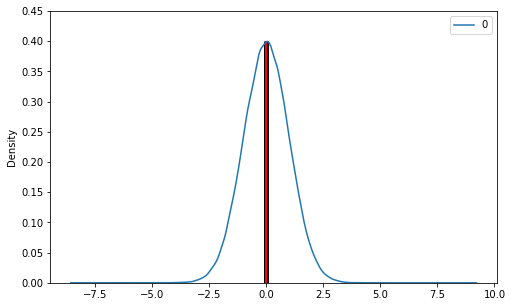

In [18]:
norm_data = pd.DataFrame(np.random.normal(size=100000))

norm_data.plot(kind="density",figsize=(8,5), ylim=(0,0.45))

# Plot black line at mean
plt.vlines(norm_data.mean(), ymin=0, ymax=0.4, linewidth=5.0)

# Plot red line at median
plt.vlines(norm_data.median(), ymin=0, ymax=0.4, linewidth=2.0, color="red")

In the plot above the mean and median are both so close to zero that the red median line lies on top of the thicker black line drawn at the mean.

In skewed distributions, the mean tends to get pulled in the direction of the skew, while the median tends to resist the effects of skew:

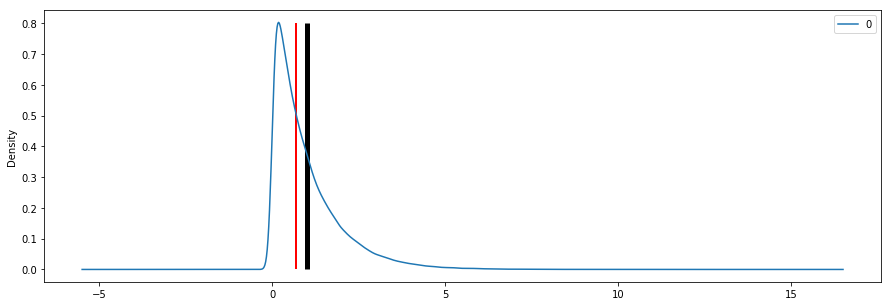

In [21]:
skewed_data = pd.DataFrame(np.random.exponential(size=100000))

skewed_data.plot(kind="density",figsize=(15,5))

# Plot black line at mean
plt.vlines(skewed_data.mean(), ymin=0, ymax=0.8, linewidth=5.0)

# Plot red line at median
plt.vlines(skewed_data.median(), ymin=0, ymax=0.8, linewidth=2.0, color="red")

The mean is also influenced heavily by outliers, while the median resists the influence of outliers:

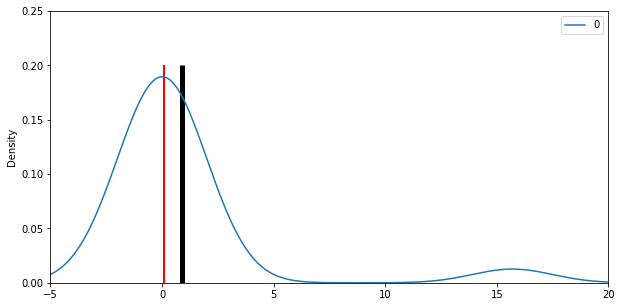

In [23]:
norm_data = np.random.normal(size=50)
outliers = np.random.normal(15, size=3)
combined_data = pd.DataFrame(np.concatenate((norm_data, outliers), axis=0))

combined_data.plot(kind="density",figsize=(10,5),xlim=(-5,20), ylim=(0,0.25))

# Plot black line at mean
plt.vlines(combined_data.mean(), ymin=0, ymax=0.2, linewidth=5.0)

# Plot red line at median
plt.vlines(combined_data.median(), ymin=0, ymax=0.2, linewidth=2.0, color="red")

Since the median tends to resist the effects of skewness and outliers, it is known a "robust" statistic. The median generally gives a better sense of the typical value in a distribution with significant skew or outliers.

The mode of a variable is simply the value that appears most frequently. Unlike mean and median, you can take the mode of a categorical variable and it is possible to have multiple modes.

In [38]:
mtcars['mpg'].mode()

0    10.4
1    15.2
2    19.2
3    21.0
4    21.4
5    22.8
6    30.4
dtype: float64

The columns with multiple modes (multiple values with the same count) return multiple values as the mode. Columns with no mode (no value that appears more than once) return NaN.

# Measures of Spread

Measures of spread (dispersion) are statistics that describe how data varies. While measures of center give us an idea of the typical value, measures of spread give us a sense of how much the data tends to diverge from the typical value.

One of the simplest measures of spread is the range. Range is the distance between the maximum and minimum observations:

In [39]:
max(mtcars['mpg']) - min(mtcars['mpg'])

23.5

As noted earlier, the median represents the 50th percentile of a data set. A summary of several percentiles can be used to describe a variable's spread. We can extract the minimum value (0th percentile), first quartile (25th percentile), median, third quartile(75th percentile) and maximum value (100th percentile) using the quantile() function:

In [40]:
five_num = [mtcars["mpg"].quantile(0),   
            mtcars["mpg"].quantile(0.25),
            mtcars["mpg"].quantile(0.50),
            mtcars["mpg"].quantile(0.75),
            mtcars["mpg"].quantile(1)]

five_num

[10.4, 15.425, 19.2, 22.8, 33.9]

Since these values are so commonly used to describe data, they are known as the "five number summary". They are the same percentile values returned by df.describe():

In [41]:
mtcars['mpg'].describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

Interquartile (IQR) range is another common measure of spread. IQR is the distance between the 3rd quartile and the 1st quartile:

In [42]:
mtcars["mpg"].quantile(0.75) - mtcars["mpg"].quantile(0.25)

7.375

The boxplots are just visual representations of the five number summary and IQR:

Text(0.7,19.5,'IQR')

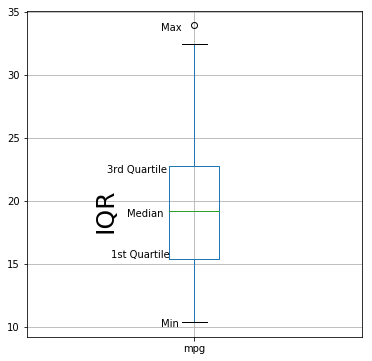

In [44]:
mtcars.boxplot(column="mpg", return_type='axes', figsize=(6,6))

plt.text(x=0.74, y=22.25, s="3rd Quartile")
plt.text(x=0.8, y=18.75, s="Median")
plt.text(x=0.75, y=15.5, s="1st Quartile")
plt.text(x=0.9, y=10, s="Min")
plt.text(x=0.9, y=33.5, s="Max")
plt.text(x=0.7, y=19.5, s="IQR", rotation=90, size=25)

Variance and standard deviation are two other common measures of spread. The variance of a distribution is the average of the squared deviations (differences) from the mean. Use df.var() to check variance:

In [45]:
mtcars["mpg"].var()

36.32410282258064

The standard deviation is the square root of the variance. Standard deviation can be more interpretable than variance, since the standard deviation is expressed in terms of the same units as the variable in question while variance is expressed in terms of units squared. Use df.std() to check the standard deviation:

In [46]:
mtcars["mpg"].std()

6.026948052089104